## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="outer")
# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

len(mouse_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_df.loc[mouse_df[["Mouse ID","Timepoint"]].duplicated(keep=False),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
mouse_df.loc[(mouse_df["Mouse ID"] == "g989"),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# mouse_df.set_index("Mouse ID")
mouse_cleaned_df = mouse_df.loc[(mouse_df["Mouse ID"] != "g989"),:]
mouse_cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(mouse_cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Create tumor volume series
tv = mouse_cleaned_df["Tumor Volume (mm3)"]

tv_mean = np.mean(tv)
tv_median = np.median(tv)
tv_var = np.var(tv,ddof=0)
tv_sd = np.std(tv,ddof=0)
tv_sem = sem(tv)

tumor_summ_df = pd.DataFrame({
    "Tumor Volume Stats":["Mean", "Median", "Variance", "Std Dev", "SEM"],
    "Value":[tv_mean,tv_median,tv_var,tv_sd,tv_sem]})
print("-----ALL DRUG REGIMES TUMOR VOLUME SUMMARY STATISTICS----")
print(tumor_summ_df)
print("---------------------------------\n")

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_and_vol = mouse_cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]]
drug_and_vol
group_by_regimen_df = drug_and_vol.groupby(["Drug Regimen"])
summary_df =pd.DataFrame({})
summary_df["Mean"] = group_by_regimen_df["Tumor Volume (mm3)"].mean()
summary_df["Median"] = group_by_regimen_df["Tumor Volume (mm3)"].median()
summary_df["Variance"]=group_by_regimen_df["Tumor Volume (mm3)"].var()
summary_df["Std Dev"]=group_by_regimen_df["Tumor Volume (mm3)"].std()
summary_df["SEM"]=group_by_regimen_df["Tumor Volume (mm3)"].sem()
print("-----TUMOR SUMMARY STATISTICS BY DRUG REGIMEN----")
summary_df

-----ALL DRUG REGIMES TUMOR VOLUME SUMMARY STATISTICS----
  Tumor Volume Stats      Value
0               Mean  50.435293
1             Median  48.933454
2           Variance  79.420640
3            Std Dev   8.911826
4                SEM   0.205591
---------------------------------

-----TUMOR SUMMARY STATISTICS BY DRUG REGIMEN----


,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:title={'center':'Drug Regimen'}>

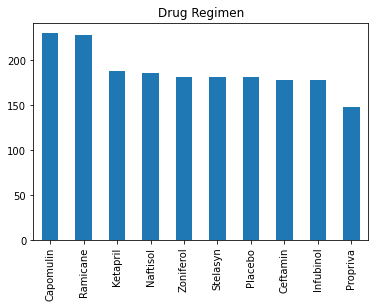

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
measure_by_regimen_df = mouse_cleaned_df["Drug Regimen"].value_counts()
measure_by_regimen_df.plot(kind="bar", title = "Drug Regimen",ylabel="",tick_label=measure_by_regimen.tolist())

Text(0.5, 1.0, 'Drug Regimen')

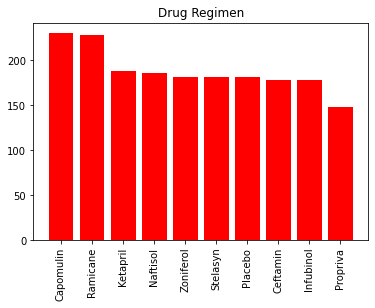

In [24]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = measure_by_regimen_df.keys()
y_axis = measure_by_regimen_df.tolist()
plt.xticks(rotation=90)
plt.bar(x_axis,y_axis,color="red")
plt.title("Drug Regimen")

<AxesSubplot:title={'center':'Distribution of female versus male mice'}>

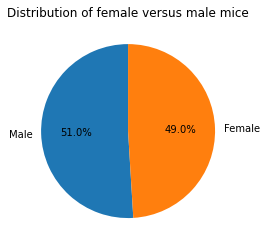

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_df = mouse_cleaned_df["Sex"].value_counts()
mouse_sex_df.plot(kind="pie",title="Distribution of female versus male mice",autopct="%1.1f%%",ylabel="",startangle=90)



Text(0.5, 1.0, 'Distribution of female versus male mice')

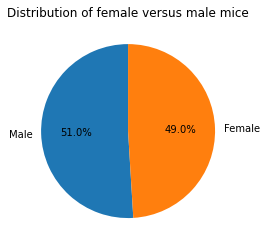

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_labels = mouse_sex_df.keys()
sex_values = mouse_sex_df.tolist()

plt.pie(sex_values,labels=sex_labels,autopct="%1.1f%%",startangle=90)
plt.title("Distribution of female versus male mice")

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_by_mouse = mouse_cleaned_df.groupby(["Mouse ID"])
lgst_tp = grouped_by_mouse["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatment_df = pd.merge(lgst_tp,mouse_cleaned_df,on=["Mouse ID","Timepoint"],how="left")
treatment_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [42]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin_df = treatment_df.loc[(treatment_df["Drug Regimen"]=="Capomulin"),:]
Capomulin = Capomulin_df["Tumor Volume (mm3)"]
Ramicane_df = treatment_df.loc[(treatment_df["Drug Regimen"]=="Ramicane"),:]
Ramicane=Ramicane_df["Tumor Volume (mm3)"]
Infubinol_df = treatment_df.loc[(treatment_df["Drug Regimen"]=="Infubinol"),:]
Infubinol=Infubinol_df["Tumor Volume (mm3)"]
Ceftamin_df = treatment_df.loc[(treatment_df["Drug Regimen"]=="Ceftamin"),:]
Ceftamin=Ceftamin_df["Tumor Volume (mm3)"]

# Create empty list to fill with tumor vol data (for plotting)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Capomulin IQR
C_quartiles = Capomulin.quantile([.25,.5,.75])
C_lowerq = C_quartiles[0.25]
C_upperq = C_quartiles[0.75]
C_iqr = C_upperq-C_lowerq
C_iqr
C_lower_bound = C_lowerq - (1.5*C_iqr)
C_upper_bound = C_upperq + (1.5*C_iqr)
print(f"Capomulin IQR is {round(C_iqr,2)}. Any number lower than {round(C_lower_bound,2)} and greater than {round(C_upper_bound,2)} is a potential outlier")
# Ramicane IQR
R_quartiles = Ramicane.quantile([.25,.5,.75])
R_lowerq = R_quartiles[0.25]
R_upperq = R_quartiles[0.75]
R_iqr = R_upperq-R_lowerq
R_iqr
print(f"Ramicane IQR is {round(R_iqr,2)}. Any number lower than {round(R_lower_bound,2)} and greater than {round(R_upper_bound,2)} is a potential outlier")
R_lower_bound = R_lowerq - (1.5*R_iqr)
R_upper_bound = R_upperq + (1.5*R_iqr)
# Infubinol IQR
I_quartiles = Infubinol.quantile([.25,.5,.75])
I_lowerq = I_quartiles[0.25]
I_upperq = I_quartiles[0.75]
I_iqr = I_upperq-I_lowerq
I_iqr
I_lower_bound = I_lowerq - (1.5*I_iqr)
I_upper_bound = I_upperq + (1.5*I_iqr)
print(f"Infubinol IQR is {round(I_iqr,2)}. Any number lower than {round(I_lower_bound,2)} and greater than {round(I_upper_bound,2)} is a potential outlier")
# Ceftamin IQR
Ce_quartiles = Ceftamin.quantile([.25,.5,.75])
Ce_lowerq = Ce_quartiles[0.25]
Ce_upperq = Ce_quartiles[0.75]
Ce_iqr = Ce_upperq-I_lowerq
Ce_iqr
Ce_lower_bound = Ce_lowerq - (1.5*Ce_iqr)
Ce_upper_bound = Ce_upperq + (1.5*Ce_iqr)
print(f"Ceftamin IQR is {round(Ce_iqr,2)}. Any number lower than {round(Ce_lower_bound,2)} and greater than {round(Ce_upper_bound,2)} is a potential outlier")    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin IQR is 7.78. Any number lower than 20.7 and greater than 51.83 is a potential outlier
Ramicane IQR is 9.1. Any number lower than 17.91 and greater than 54.31 is a potential outlier
Infubinol IQR is 11.48. Any number lower than 36.83 and greater than 82.74 is a potential outlier
Ceftamin IQR is 10.25. Any number lower than 33.35 and greater than 79.68 is a potential outlier


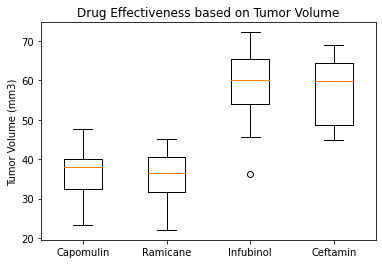

In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_bxplot = [Capomulin, Ramicane, Infubinol,Ceftamin]
labels =["Capomulin","Ramicane","Infubinol","Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Effectiveness based on Tumor Volume')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data_bxplot, labels=labels)
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume over Time on Moise S185 using Capomulin')

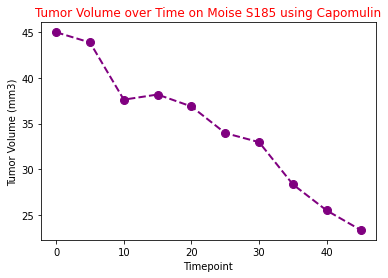

In [35]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_s185_df = mouse_cleaned_df.loc[(mouse_cleaned_df["Drug Regimen"]== "Capomulin") & (mouse_cleaned_df["Mouse ID"]== "s185"),:]
Capomulin_s185_df
h_axis = Capomulin_s185_df["Timepoint"]
v_axis = Capomulin_s185_df["Tumor Volume (mm3)"]
plt.plot(h_axis,v_axis,color="purple", marker='o', linestyle='dashed', linewidth=2, markersize=8)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume over Time on Moise S185 using Capomulin", color="red")

Text(0.5, 1.0, 'Capomulin Regime: Mouse Weight vs Average Tumor Volume')

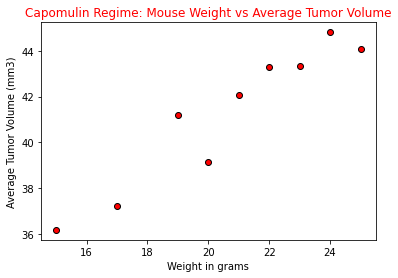

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Reg_df = mouse_cleaned_df.loc[(mouse_cleaned_df["Drug Regimen"]== "Capomulin"),:]
Capomulin_by_mouse_wgt = Capomulin_Reg_df.groupby(Capomulin_Reg_df["Weight (g)"])
ave_wgt_df = Capomulin_by_mouse_wgt.mean()
ave_wgt_df
# ave_wgt_df.index.get_level_values(0)
x = ave_wgt_df["Tumor Volume (mm3)"].index.get_level_values(0)
y = ave_wgt_df["Tumor Volume (mm3)"].tolist()
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Regime: Mouse Weight vs Average Tumor Volume", color="red")

## Correlation and Regression

The correlation between both factors is 0.95


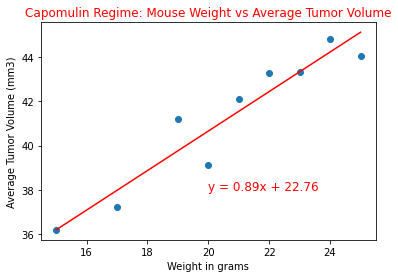

In [37]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=12,color="r")
plt.xlabel("Weight in grams")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Regime: Mouse Weight vs Average Tumor Volume", color="red")
plt.show()